# データ解析特論 2022年度水曜２限

# 第2回 その3 線形回帰 with Iris

## まずは準備から

In [1]:
# ライブラリ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
# conda install scikit-learn

# Irisデータセット読み込み
iris = datasets.load_iris()


## Iris データセットに何が含まれているか

In [2]:
# データセットに何が含まれているか
for a in iris:
    print(a)


data
target
frame
target_names
DESCR
feature_names
filename
data_module


## データを確認

In [6]:
# データは data 属性に numpy.ndarray として入っている
#iris.data


In [5]:
# iris.data の形を表示
type(iris.data)
iris.data.shape

(150, 4)

150 x 4 の二次元配列（行列）として格納されている

## 特徴量

つまり変数名を確認

In [7]:
# データの特徴量
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## あやめの種類

In [10]:
# あやめの種類は target 属性に numpy.ndarray として入っている
print(iris.target)
print(iris.target.shape)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


あやめの種類は 0, 1, 2 として数字で表されている  
どの数字がその種に対応するかを調べる

In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


0 が setosa, 1 が versicolor，2 が virginica

## データフレーム

In [13]:
# Pandas の data frame として格納
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 種類の情報を df に追加
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# data frame の最初の5インスタンスを表示
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# data frame の最後の5インスタンスを表示

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## データの配列への格納

In [23]:
# Sepal Length の値 (cm) を SL に格納
# データの0列目が sepal length
SL = iris.data[:, 0]
print(SL.shape)

# sepal width の値 (cm) を SW に格納
# データの1列目が sepal width
SW = iris.data[:, 1]

# Petal Length の値 (cm) を PL に格納
# データの2列目が petal length
PL = iris.data[:, 2]

# Petal Widht の値 (cm) を PW に格納
# データの3列目が petal width
PW = iris.data[:, 3]

# Species の値 (cm) を Sp に格納
Sp = iris.target


(150,)


## まずは可視化

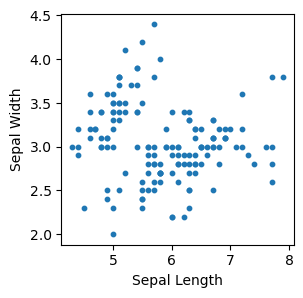

In [32]:
# SLとSWの散布図
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(SL, SW, s=10)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
# plt.xlabel
plt.show()

## 層別

In [37]:
# 種類で分ける
Sp==0
print(SL)
print(SL[Sp==1] )

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]


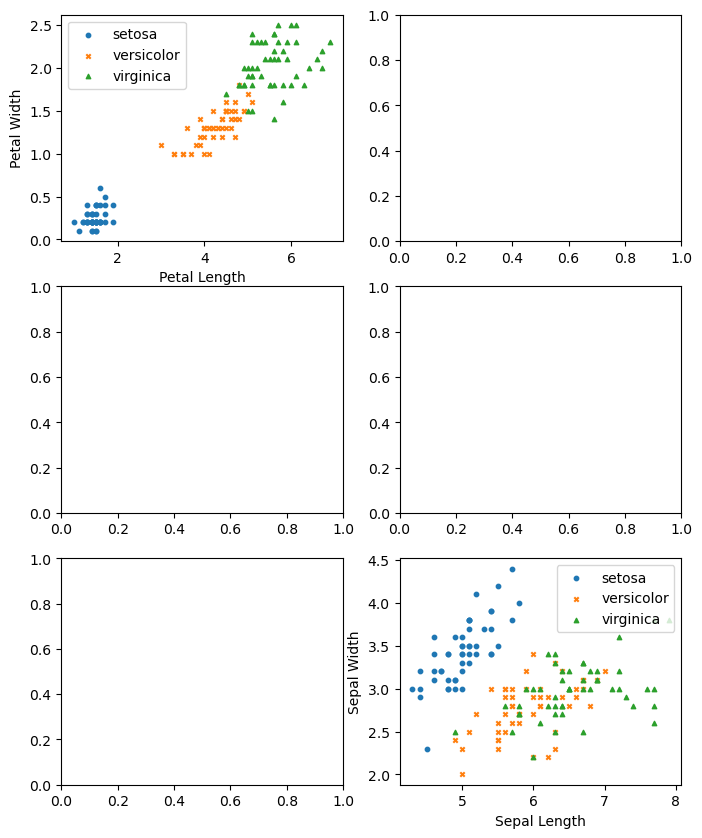

In [48]:
# 種類ごとに描画
markers = ['o', 'x', '^']
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
for i in range(3):
    ax[0, 0].scatter(PL[Sp==i], PW[Sp==i], s=10, label=iris.target_names[i], 
               marker=markers[i])
    ax[2, 1].scatter(SL[Sp==i], SW[Sp==i], s=10, label=iris.target_names[i], 
               marker=markers[i])
ax[0, 0].set_xlabel('Petal Length')
ax[0, 0].set_ylabel('Petal Width')
ax[2, 1].set_xlabel('Sepal Length')
ax[2, 1].set_ylabel('Sepal Width')
ax[0, 0].legend()
ax[2, 1].legend()
plt.show()

## マルチプロット

In [ ]:
# 種類ごとに描画




## ついに線形回帰

3.418946836103816 -0.061884797964144124


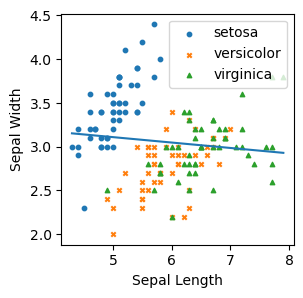

In [71]:
# 線形回帰 SW ~ SL
# <SW> = b1<SL> + b0
b1 = np.cov(SL.reshape(-1), SW, ddof=0)[0, 1] / np.var(SL, ddof=0)
b0 = np.mean(SW) - b1*np.mean(SL)
print(b0, b1)

# 種類ごとに描画
markers = ['o', 'x', '^']
fig, ax = plt.subplots(figsize=(3, 3))
for i in range(3):
    ax.scatter(SL[Sp==i], SW[Sp==i], s=10, label=iris.target_names[i], 
               marker=markers[i])
x0, x1 = np.min(SL), np.max(SL)
y0, y1 = b0+b1*x0, b0+b1*x1
ax.plot([x0, x1], [y0, y1])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()
plt.show()

## 決定係数

In [54]:
# 決定係数
# 総平方和
S = np.sum( (SW-np.mean(SW))**2 )

# yhat 回帰した推定値
SWhat = b0 + b1*SL

# 回帰残差
E = SW - SWhat
# 残差平方和
Se = np.sum(E**2)

# 決定係数 R^2
1.0 - Se/S

0.013822031527047973

## 層別に線形回帰しよう

[0.8148248  0.32624423 0.23662295]
[-0.65101293  0.83341425  1.41512798]


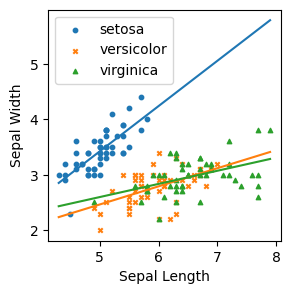

In [57]:
b0s, b1s = np.zeros(3), np.zeros(3)
for i in range(3):
    b1s[i] = np.cov(SL[Sp==i], SW[Sp==i])[0, 1] / np.var(SL[Sp==i])
    b0s[i] = np.mean(SW[Sp==i]) - b1s[i]*np.mean(SL[Sp==i])
print(b1s)
print(b0s)

fig, ax = plt.subplots(figsize=(3, 3))
x0, x1 = np.min(SL), np.max(SL)
for i in range(3):
    ax.scatter(SL[Sp==i], SW[Sp==i], s=10, label=iris.target_names[i], 
               marker=markers[i])
    y0, y1 = b0s[i]+b1s[i]*x0, b0s[i]+b1s[i]*x1
    ax.plot([x0, x1], [y0, y1])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()
plt.show()

## 層別の決定係数

In [58]:
for i in range(3):
    X, Y = SL[Sp==i], SW[Sp==i]
    S = np.sum((Y-np.mean(Y))**2)
    
    Yhat = b0s[i] + b1s[i]*X
    E = Y - Yhat
    Se = np.sum(E**2)
    print(1.0-Se/S)


0.5511459362522084
0.27646688801626174
0.20897020516570985


## scikit-learn を使おう

簡単な学習モデルは scikit-learn で十分！

In [62]:
# 配列の reshape
#SL = iris.data[:, 0:1]
SL = SL.reshape(-1, 1)
SL.shape

(150, 1)

## 線形回帰モデル

インスタンス化・学習たったこれだけ

In [74]:
# skleran をインポートして
from sklearn.linear_model import LinearRegression

# 回帰器設定
reg = LinearRegression()

# 学習
reg.fit(SL, SW)

# 回帰係数の表示
print(reg.coef_[0])
print(b1)
print(reg.intercept_)
print(b0)

print(reg.score(SL, SW))

-0.061884797964144145
-0.061884797964144124
3.418946836103816
3.418946836103816
0.013822654141080637


## 決定係数

In [ ]:
# 層別に決定係数を表示


### 上での計算結果と確認

ここに上で計算した時の回帰係数をメモする


In [ ]:
# 各スコア



## 重線形回帰

### 3次元プロット

3次元描画の場合は inline ではなく notebook の形式を用いる方が良い

In [ ]:
# 3次元描画


## 重線形回帰

In [ ]:
#重線形回帰
# PL = a*SL + b*SW + c



In [ ]:
%matplotlib notebook
# 結果の可視化



<h3><div style="text-align: right;">以上</div></h3>